In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = load_breast_cancer()
X = data.data
y = data.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.svm import SVC

# Assuming X_train and y_train are already defined
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [36]:
y_pred = svm_classifier.predict(X_test)

In [37]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print('accuracy_score : \n', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix : \n', conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print('classification_report : \n', classification_rep)

accuracy_score : 
 0.956140350877193
confusion_matrix : 
 [[41  2]
 [ 3 68]]
classification_report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM classifier
svm_classifier = SVC()

# Apply GridSearchCV with 5-fold cross-validation (cv=5)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {best_params}")


Best Parameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [40]:
# Predict using the best estimator found by GridSearchCV
y_pred_best = best_estimator.predict(X_test)

# Calculate accuracy for the best estimator
accuracy_best = accuracy_score(y_test, y_pred_best)
print('accuracy_score (best): \n', accuracy_best)

# Confusion Matrix for the best estimator
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print('confusion_matrix (best): \n', conf_matrix_best)

# Classification Report for the best estimator
classification_rep_best = classification_report(y_test, y_pred_best)
print('classification_report (best): \n', classification_rep_best)


accuracy_score (best): 
 0.9736842105263158
confusion_matrix (best): 
 [[41  2]
 [ 1 70]]
classification_report (best): 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



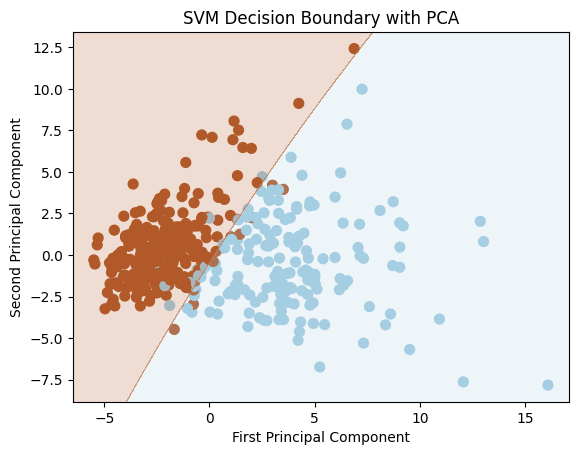

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Assuming X_train and X_test are already defined

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM classifier (using the best parameters from GridSearch)
svm_classifier = SVC(C=1000, gamma=0.0001, kernel='rbf')
svm_classifier.fit(X_train_pca, y_train)

# Plot the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, s=50, label="Training Data")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use SVM classifier to predict the labels for each point in the meshgrid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the results back to the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.title("SVM Decision Boundary with PCA")
plt.show()
